In [ ]:
using LazySets, ForwardDiff

In [ ]:
function my_func2(a₁_x, a₁_y, a₂_x, a₂_y, a₃_x, a₃_y,
                  b₁_x, b₁_y, b₂_x, b₂_y, b₃_x, b₃_y)
    
    p = VPolygon([a₁_x a₂_x a₃_x
                  a₁_y a₂_y a₃_y], apply_convex_hull=false)
    #=
    p = tohrep(p)

    q = VPolygon([b₁_x b₂_x b₃_x
                  b₁_y b₂_y b₃_y])
    q = tohrep(q)
    
    intersection(p, q)
    =#
end


In [ ]:
function my_func3(p, q)
    intersection(p, q)
end

In [ ]:
p = convert(HPolygon, BallInf(zeros(2), 1.0))
q = copy(p)

In [ ]:
myfunc3(p, q)

In [ ]:
ForwardDiff.gradient(x -> my_func3(x...), (p, q))

In [ ]:
v = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
ForwardDiff.gradient(x -> my_func2(x...), v)

In [ ]:
my_func2(v...)

In [ ]:
LazySets.default_tolerance(::Type{<:ForwardDiff.Dual}) = LazySets.default_tolerance(Float64)

In [ ]:
p = rand(VPolygon) |> tohrep
q = rand(VPolygon) |> tohrep
intersection(p, q)

In [ ]:
vertices_list(p)

In [ ]:
vertices_list(q)

In [ ]:
using LazySets: Tolerance
using ForwardDiff: Dual

LazySets.default_tolerance(N::Type{<:Dual}) = Tolerance(Base.rtoldefault(N), sqrt(eps(N)), zero(N))

In [ ]:
ForwardDiff.gradient(x->my_func(x...), rand(12))

In [ ]:
p = rand(VPolygon) |> tohrep
q = rand(VPolygon) |> tohrep

@which intersection(p, q)

In [ ]:
intersection(tohrep(p), tohrep(q))

In [ ]:
intersection(VPolygon([a₁_x a₂_x a₃_x
0                                                                     a₁_y a₂_y a₃_y]),
                                                           VPolygon([b₁_x b₂_x b₃_x
                                                                     b₁_y b₂_y b₃_y]))

In [ ]:
function foo1(a₁_x, a₁_y, a₂_x, a₂_y, a₃_x, a₃_y)
    p = VPolygon([a₁_x a₂_x a₃_x
                  a₁_y a₂_y a₃_y])
    area(p)
end

In [ ]:
foo1(v...)

In [4]:
function foo2(a₁_x, a₁_y, a₂_x, a₂_y, a₃_x, a₃_y,
              b₁_x, b₁_y, b₂_x, b₂_y, b₃_x, b₃_y)
    
    p = VPolygon([a₁_x a₂_x a₃_x
                  a₁_y a₂_y a₃_y])

    q = VPolygon([b₁_x b₂_x b₃_x
                  b₁_y b₂_y b₃_y])
    
    area(q)
end

foo2 (generic function with 1 method)

In [5]:
v = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
ForwardDiff.gradient(x -> foo2(x...), v)

LoadError: UndefVarError: ForwardDiff not defined

In [7]:
using LazySets, ForwardDiff, Plots

In [2]:
_isinside(p, a, b) = (b[1] - a[1]) * (p[2] - a[2]) > (b[2] - a[2]) * (p[1] - a[1])

function _intersection_line_segments(a, b, s, f)
    dc = [a[1] - b[1], a[2] - b[2]]
    dp = [s[1] - f[1], s[2] - f[2]]
    n1 = a[1] * b[2] - a[2] * b[1]
    n2 = s[1] * f[2] - s[2] * f[1]
    n3 = 1.0 / (dc[1] * dp[2] - dc[2] * dp[1])

    α = (n1 * dp[1] - n2 * dc[1]) * n3
    β = (n1 * dp[2] - n2 * dc[2]) * n3
    [α, β]
end

function _intersection_vrep(spoly::Vector{VT}, cpoly::Vector{VT}) where {N, VT<:AbstractVector{N}}
    outarr = spoly
    q = cpoly[end]
    for p in cpoly
        inarr = outarr
        outarr = Vector{VT}()
        s = inarr[end]
        for vtx in inarr
            if _isinside(vtx, q, p)
                if !_isinside(s, q, p)
                    push!(outarr, _intersection_line_segments(q, p, s, vtx))
                end
                push!(outarr, vtx)
            elseif _isinside(s, q, p)
                push!(outarr, _intersection_line_segments(q, p, s, vtx))
            end
            s = vtx
        end
        q = p
    end
    outarr
end

_intersection_vrep (generic function with 1 method)

In [3]:
struct Point
    x::Float64
    y::Float64
end

In [4]:
subjectp = [Point(50, 150), Point(200, 50), Point(350, 150), Point(350, 300),
            Point(250, 300), Point(200, 250), Point(150, 350), Point(100, 250), Point(100, 200)]
 
clipp = [Point(100, 100), Point(300, 100), Point(300, 300), Point(100, 300)];

In [6]:
A = [[p.x, p.y] for p in subjectp]

B = [[p.x, p.y] for p in clipp];

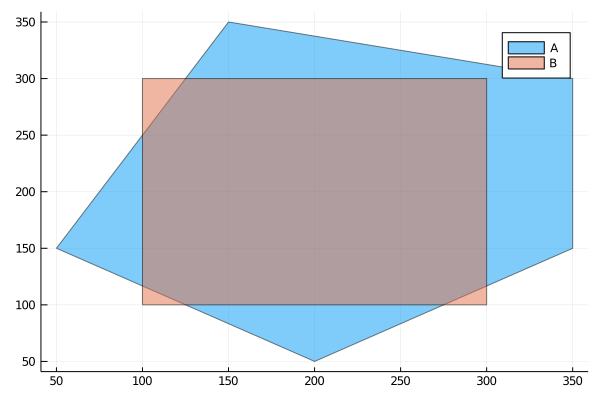

In [9]:
plot(VPolygon(A), lab="A")
plot!(VPolygon(B), lab="B")

In [ ]:
clipped = clipSH(subjectp, clipp)

In [1]:
using LazySets, Plots

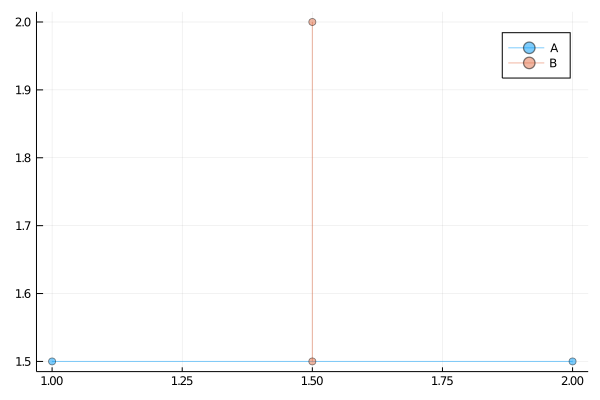

In [2]:
α = 1.5000000000001
β = 1.4999999999999999
A = LineSegment([1.0, β], [2.0, β])
B = LineSegment([1.5, α], [1.5, 2])
plot(A, lab="A")
plot!(B, lab="B")

In [3]:
LazySets.set_rtol(Float64, 1e-12)

@show intersection(A, B)

LazySets.set_rtol(Float64, 1e-20)

@show intersection(A, B)

intersection(A, B) = Singleton{Float64,Array{Float64,1}}([1.5, 1.5])
intersection(A, B) = EmptySet{Float64}(2)


EmptySet{Float64}(2)

In [36]:
LazySets.set_rtol(Float64, 1e-20)
LazySets.set_ztol(Float64, 1e-20)
LazySets.set_atol(Float64, 1e-20)

@show isdisjoint(A, B)
@show intersection(A, B)

isdisjoint(A, B) = true
intersection(A, B) = EmptySet{Float64}(2)


EmptySet{Float64}(2)

In [44]:
LazySets.set_rtol(Float64, 1e-10)
LazySets.set_ztol(Float64, 1e-10)
LazySets.set_atol(Float64, 1e-10)

intersection(A, B)

EmptySet{Float64}(2)

In [52]:
α = 1.50000000000001
β = 1.4999999999999999
A = LineSegment([1.0, β], [2.0, β])
B = LineSegment([1.5, α], [1.5, 2])

LazySets.set_rtol(Float64, 1e-4)
LazySets.set_ztol(Float64, 1e-4)
LazySets.set_atol(Float64, 1e-4)

intersection(A, B)

EmptySet{Float64}(2)

In [65]:
function _intersection(a::LineSegment{N}, b::LineSegment{N}) where {N<:Real}
    # cast a as line
    ap = Line2D(a.p, a.q)
    bp = Line2D(b.p, b.q)
    # find intersection between a' and b
    m = intersection(ap, bp)
    return m
    println("intersection is: ", m)
    if m == ap
        # determine which segment is in both
        p1 = max(min(a.p[1], a.q[1]), min(b.p[1], b.q[1]))
        p2 = max(min(a.p[2], a.q[2]), min(b.p[2], b.q[2]))
        q1 = min(max(a.p[1], a.q[1]), max(b.p[1], b.q[1]))
        q2 = min(max(a.p[2], a.q[2]), max(b.p[2], b.q[2]))
        if LazySets._isapprox(p1, q1) && LazySets._isapprox(p2, q2)
             # edges have a point in common
             return Singleton([p1, p2])
        elseif LazySets._leq(p1, q1) && LazySets._leq(p2, q2)
             return LineSegment([p1, p2], [q1, q2])
        else
            # no intersection
            return EmptySet{N}(2)
        end
    elseif m isa Singleton && m.element ∈ a && m.element ∈ b
        # if the intersection between lines is in the segments
        return m
    else
        println("ASDF")
        # no intersection
        return EmptySet{N}(2)
    end
end

_intersection (generic function with 1 method)

In [71]:
m = _intersection(A, B)

@which m.element ∈ B

in(x::AbstractArray{N,1}, L::LineSegment{N,VN} where VN<:AbstractArray{N,1}) where N<:Real in LazySets at /home/mforets/.julia/dev/LazySets/src/Sets/LineSegment.jl:160

In [86]:
using LazySets: _leq

function _in(x::AbstractVector{N}, L::LineSegment{N}) where {N<:Real}
    @assert length(x) == dim(L)

    # check if point x is on the line through the line segment (p, q)
    p = L.p
    q = L.q
    if LazySets.isapproxzero(LazySets.right_turn(p, q, x))
        println("ASDF")
        # check if the point is inside the box approximation of the line segment
        return _leq(min(p[1], q[1]), x[1]) && _leq(x[1], max(p[1], q[1])) &&
               _leq(min(p[2], q[2]), x[2]) && _leq(x[2], max(p[2], q[2]))
    else
        return false
    end
end

_in (generic function with 1 method)

In [83]:
x = m.element

2-element Array{Float64,1}:
 1.5
 1.5

In [106]:
B

LineSegment{Float64,Array{Float64,1}}([1.5, 1.50000000000001], [1.5, 2.0])

In [87]:
# approximate membership test
@test [1.5, 1.5] ∈ LineSegment([1.5, 1.50000000000001], [1.5, 2.0])

# change the default Float64 tolerance
r = LazySets._rtol(Float64)
LazySets.set_rtol(Float64, 1e-20)
@test !([1.5, 1.5] ∈ LineSegment([1.5, 1.50000000000001], [1.5, 2.0]))
LazySets.set_rtol(Float64, r); # change back

ASDF


true

In [28]:

LazySets.set_rtol(Float64, 1e-22)
LazySets.set_ztol(Float64, 1e-22)
LazySets.set_atol(Float64, 1e-22)
@show isdisjoint(A, B)
@show intersection(A, B)

isdisjoint(A, B) = true
intersection(A, B) = EmptySet{Float64}(2)


EmptySet{Float64}(2)

In [ ]:
So say A.y =  and B.y = 1.4999999999999999 and PoI.y = 1.5

In [88]:
using BenchmarkTools

In [105]:
Z = rand(Zonotope, dim=4, num_generators=20)  135.111 ns (1 allocation: 240 bytes)
  164.918 ns (2 allocations: 480 bytes)
26.098671846834662
d = rand(4);
@btime _ρ($d, $Z)  # this branch
@btime __ρ($d, $Z) # master

  135.111 ns (1 allocation: 240 bytes)
  164.918 ns (2 allocations: 480 bytes)


26.098671846834662

In [95]:
using LinearAlgebra

function _ρ(d::AbstractVector{N}, Z::AbstractZonotope{N}) where {N<:Real}
    return dot(LazySets.center(Z), d) + sum(abs, transpose(genmat(Z)) * d)
end

_ρ (generic function with 1 method)

In [100]:
@btime _ρ($d, $Z)

  134.762 ns (1 allocation: 240 bytes)


21.7010739758896

In [104]:
function __ρ(d::AbstractVector{N}, Z::AbstractZonotope{N}) where {N<:Real}
    return dot(LazySets.center(Z), d) + sum(abs.(transpose(genmat(Z)) * d))
end

__ρ (generic function with 1 method)

------

## New branch

In [1]:
using Revise, LazySets, ForwardDiff

LazySets.default_tolerance(::Type{<:ForwardDiff.Dual}) = LazySets.default_tolerance(Float64)

┌ Info: Precompiling LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1278


In [2]:
my_func(a₁_x, a₁_y, a₂_x, a₂_y, a₃_x, a₃_y,
        b₁_x, b₁_y, b₂_x, b₂_y, b₃_x, b₃_y) = intersection(VPolygon([a₁_x a₂_x a₃_x
                                                                     a₁_y a₂_y a₃_y]),
                                                           VPolygon([b₁_x b₂_x b₃_x
                                                                     b₁_y b₂_y b₃_y])) |> area

my_func (generic function with 1 method)

In [15]:
p = rand(VPolygon)
q = rand(VPolygon)
intersection(p, q)

EmptySet{Float64}(2)

In [22]:
q = convert(VPolytope, rand(VPolygon))

intersection(q, p)

VPolytope{Float64,Array{Float64,1}}([[0.3464862015841542, 1.9878791859095462], [-0.06928538031318324, 1.8538493254352784], [0.34293139618142304, 1.9439455313767025]])

In [24]:
q = convert(VPolytope, rand(Interval))


VPolytope{Float64,Array{Float64,1}}([[0.060599765001856765], [0.9165041946233534]])

In [27]:
@btime intersection($q, $q)

  343.912 ns (7 allocations: 672 bytes)


VPolytope{Float64,Array{Float64,1}}([[0.060599765001856765], [0.9165041946233534]])

In [11]:
p = rand(VPolygon)
q = rand(VPolygon)
@which intersection(p, q)

intersection(P1::VPolygon{N,VN} where VN<:AbstractArray{N,1}, P2::VPolygon{N,VN} where VN<:AbstractArray{N,1}; apply_convex_hull) where N in LazySets at /home/mforets/.julia/dev/LazySets/src/ConcreteOperations/intersection.jl:734

In [ ]:
ConsoleProgressMonitor
LoggingExtras

In [30]:
using Plots

In [28]:
N = Float64

Float64

In [37]:
p = VPolygon([N[0, 0], N[1, 0], N[0, 1], N[1, 1]])
q = VPolygon([N[1, -1/2], N[-1/2, 1], N[-1/2, -1/2]])
x = intersection(p, q)
isequivalent(x, VPolygon([N[0, 0], N[1/2, 0], N[0, 1/2]]))

plot(p, lab="p")

plot!(q, lab="q")

plot!(x)

LoadError: MethodError: no method matching _isapprox(::Array{Array{Float64,1},1}, ::Array{Array{Float64,1},1})

In [69]:
using Test

N = Float64

p = VPolygon([N[0, 0], N[1, 0], N[0, 1], N[1, 1]])
q = VPolygon([N[1, -1/2], N[-1/2, 1], N[-1/2, -1/2]])
x = intersection(p, q)
o = VPolygon([N[0, 0], N[1/2, 0], N[0, 1/2]])
@test x ⊆ o && o ⊆ x# TODO use isequivalent

Test Passed

In [70]:
LazySets._intersection_vrep(p.vertices, q.vertices) == x.vertices

true

In [38]:
@assert isequivalent(x, VPolygon([N[0, 0], N[1/2, 0], N[0, 1/2]]))

LoadError: MethodError: no method matching _isapprox(::Array{Array{Float64,1},1}, ::Array{Array{Float64,1},1})

In [84]:
N = Float64

# 1D set
# 1D set
paux = VPolytope([N[0], N[1]])
qaux = VPolytope([N[-1/2], N[1/2]])
xaux = intersection(paux, qaux)
oaux = VPolytope([N[0], N[1/2]])
@test xaux ⊆ oaux && oaux ⊆ xaux # TODO use isequivalent

Test Passed

In [83]:
using Polyhedra

┌ Warning: Replacing docs for `LazySets.HPolytope :: Union{Tuple{Union{HRepresentation{N}, Polyhedron{N}}}, Tuple{N}} where N` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `LazySets.HPolyhedron :: Union{Tuple{Union{HRepresentation{N}, Polyhedron{N}}}, Tuple{N}} where N` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `Polyhedra.polyhedron :: Union{Tuple{Union{HPolyhedron{N,VN} where VN<:AbstractArray{N,1}, HPolytope{N,VN} where VN<:AbstractArray{N,1}}}, Tuple{N}} where N<:Real` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227
┌ Warning: Replacing docs for `Polyhedra.polyhedron :: Union{Tuple{VPolytope{N,VN} where VN<:AbstractArray{N,1}}, Tuple{N}} where N<:Real` in module `LazySets`
└ @ Base.Docs docs/Docs.jl:227


In [50]:
B = convert(HPolygon, BallInf(zeros(2), 1.0)) # uses SingleEntryVector
P = HPolygon([HalfSpace([1.0, 0.0], 1.0), 
              HalfSpace([0.0, 1.0], 1.0), 
              HalfSpace([-1.0, 0.0], 1.0),
              HalfSpace([0.0, -1.0], 1.0)])

isequivalent(B, P)

LoadError: MethodError: no method matching _isapprox(::Array{HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}},1}, ::Array{HalfSpace{Float64,Array{Float64,1}},1})

In [51]:
P′ = HPolygon([HalfSpace([2.0, 0.0], 2.0), 
              HalfSpace([0.0, 2.0], 2.0), 
              HalfSpace([-2.0, 0.0], 2.0),
              HalfSpace([0.0, -2.0], 2.0)]);

In [54]:
isequivalent(B, P)

LoadError: MethodError: no method matching _isapprox(::Array{HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}},1}, ::Array{HalfSpace{Float64,Array{Float64,1}},1})

In [52]:
B ⊆ P && P ⊆ B
B ⊆ P′ && P′ ⊆ B

true

In [53]:
B ⊆ P′ && P′ ⊆ B

true

In [48]:
P ⊆ B && B ⊆ P

true

In [49]:
isequivalent(P, B)

LoadError: MethodError: no method matching _isapprox(::Array{HalfSpace{Float64,Array{Float64,1}},1}, ::Array{HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}},1})

In [59]:
P′.constraints[1]

HalfSpace{Float64,Array{Float64,1}}([2.0, 0.0], 2.0)

In [61]:
@which isequivalent(P′.constraints[1], B.constraints[1])

isequivalent(X::LazySet, Y::LazySet) in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/LazySet.jl:837

In [40]:
@which isequivalent(x, VPolygon([N[0, 0], N[1/2, 0], N[0, 1/2]]))

isequivalent(X::LazySet, Y::LazySet) in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/LazySet.jl:837

In [ ]:
@test isequivalent(intersection(VPolygon([N[0, 0], N[1, 0], N[0, 1], N[1, 1]]),
                                VPolygon([N[-1/2, -1/2], N[1, -1], N[-1, 1]])),
                   VPolygon([N[1, -1/2], N[1, -1], N[-1, 1]]))

In [5]:
ForwardDiff.gradient(x->my_func(x...), rand(12))

12-element Array{Float64,1}:
 -0.07691311147382354
 -0.03162958914883625
 -0.06759132362328499
 -0.057045302446526114
  0.015919071368710395
 -0.001030942952829204
  0.07103673991280712
  0.0714991262465334
 -0.014052532801395214
 -0.026335112297400043
  0.07160115661698639
  0.044541820599058216

In [4]:
p = convert(VPolygon, BallInf(zeros(2), 0.01))
q = convert(VPolygon, BallInf(ones(2), 0.01))

VPolygon{Float64,Array{Float64,1}}([[1.01, 1.01], [0.99, 1.01], [0.99, 0.99], [1.01, 0.99]])

In [5]:
area(intersection(p, q))

LoadError: AssertionError: package 'Polyhedra' not loaded (it is required for executing `default_polyhedra_backend`)

In [26]:
using BenchmarkTools

In [11]:
@btime intersection($p, $q, apply_convex_hull=false)

  312.661 ns (6 allocations: 416 bytes)


EmptySet{Float64}(2)

  314.058 ns (6 allocations: 416 bytes)


EmptySet{Float64}(2)

In [16]:
a = intersection(p, q)

EmptySet{Float64}(2)

In [18]:
vertices_list(a)

LoadError: MethodError: no method matching vertices_list(::EmptySet{Float64})
Closest candidates are:
  vertices_list(!Matched::AbstractSingleton{N}) where N<:Real at /home/mforets/.julia/dev/LazySets/src/Interfaces/AbstractSingleton.jl:241
  vertices_list(!Matched::Interval{N,IN} where IN<:IntervalArithmetic.AbstractInterval{N}) where N<:Real at /home/mforets/.julia/dev/LazySets/src/Sets/Interval.jl:392
  vertices_list(!Matched::AbstractHyperrectangle{N}) where N<:Real at /home/mforets/.julia/dev/LazySets/src/Interfaces/AbstractHyperrectangle.jl:183
  ...